<a href="https://colab.research.google.com/github/hasanalpay/machine-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('data.csv')

In [3]:
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
x=dataset.drop(columns=['CustomerID'])
x.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


# Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(x["Genre"])
x["Genre"]=le.transform(x["Genre"])

In [6]:
x.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [7]:
x=x.drop(columns=["Age"])
x.head(3)

,Genre,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,1,15,81
2,0,16,6


# İdaeal Küme Sayısını Bulma

In [8]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)



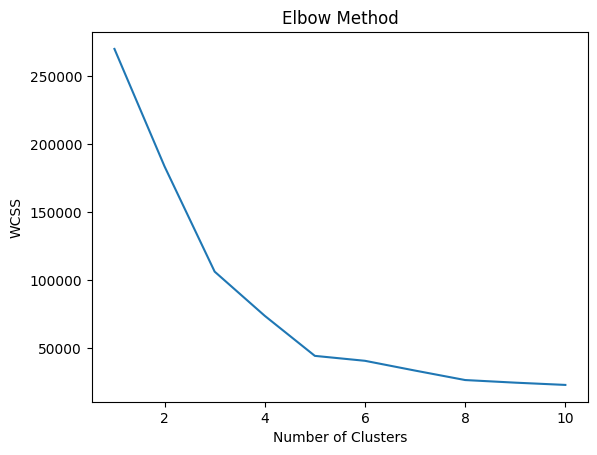

In [9]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
# Kırılımın 5'te olduğu görünür. Bu da, ideal küme sayısının 5 olması gerektiğini gösterir.

In [11]:
km=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans =km.fit_predict(x)

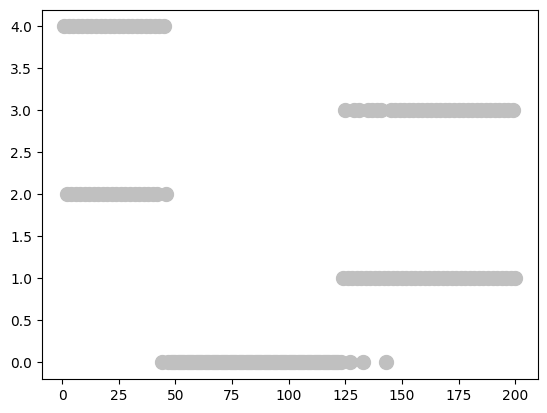

In [18]:
plt.scatter(range(1,201),y_kmeans,s=100,c="silver")

In [ ]:
# Müşterilerin kümelere genel dağılımı.

In [21]:
x.head(3)

,Genre,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,1,15,81
2,0,16,6


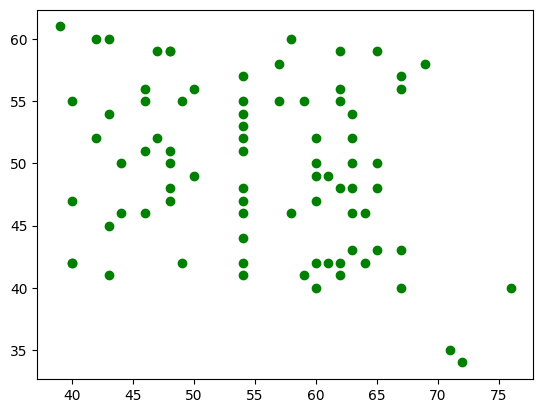

In [32]:
plt.scatter(x.iloc[y_kmeans==0 , 1],x.iloc[y_kmeans==0,2],c="green")

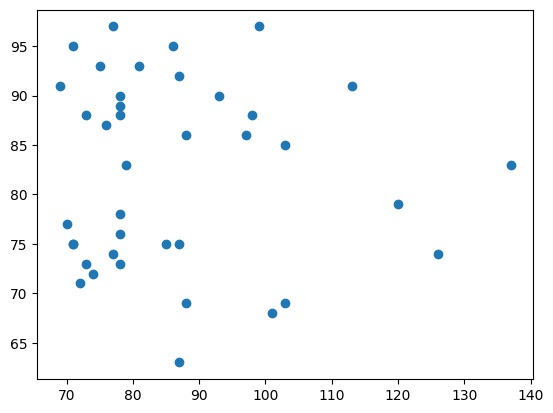

In [25]:
plt.scatter(x.iloc[y_kmeans==1 , 1],x.iloc[y_kmeans==1,2])

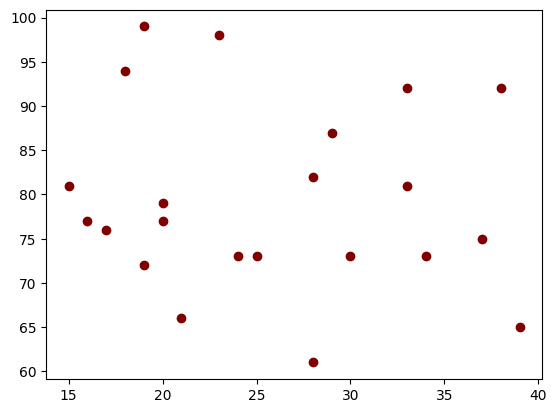

In [33]:
plt.scatter(x.iloc[y_kmeans==2 , 1],x.iloc[y_kmeans==2,2],c="maroon")

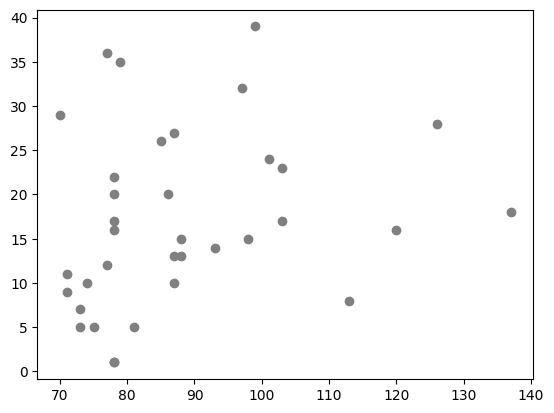

In [31]:
plt.scatter(x.iloc[y_kmeans==3 , 1],x.iloc[y_kmeans==3,2],c="grey")

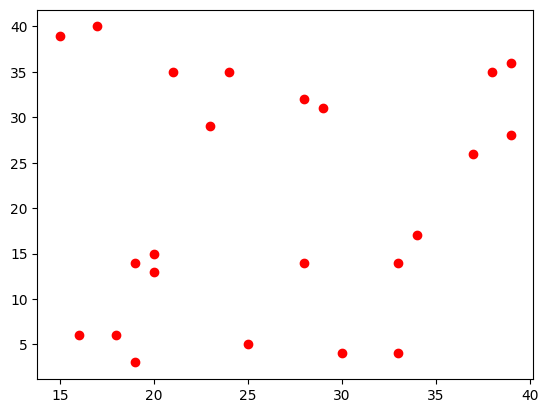

In [29]:
plt.scatter(x.iloc[y_kmeans==4 , 1],x.iloc[y_kmeans==4,2],c="red")

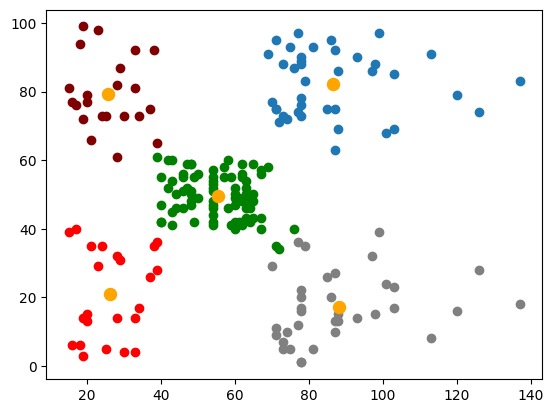

In [38]:
plt.scatter(x.iloc[y_kmeans==0 , 1],x.iloc[y_kmeans==0,2],c="green")
plt.scatter(x.iloc[y_kmeans==1 , 1],x.iloc[y_kmeans==1,2])
plt.scatter(x.iloc[y_kmeans==2 , 1],x.iloc[y_kmeans==2,2],c="maroon")
plt.scatter(x.iloc[y_kmeans==3 , 1],x.iloc[y_kmeans==3,2],c="grey")
plt.scatter(x.iloc[y_kmeans==4 , 1],x.iloc[y_kmeans==4,2],c="red")
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2],c="orange",s=75)
plt.show()

In [ ]:
# Müşterileri, özelliklerine göre başarılı bir şekilde kümelemiş olduk.